In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_json("https://data.cdc.gov/resource/k8wy-p9cg.json?data_as_of=2021-10-27T00:00:00.000")


In [5]:
data.head()

,data_as_of,start_week,end_week,state,county_name,urbanruralcode,fipsstate,fipscounty,fipscode,indicator,...,covid_19_deaths_total,non_hispanic_white,non_hispanic_black,non_hispanic_american_indian,non_hispanic_asian,non_hispanic_nhopi,hispanic,other,urbanruraldesc,footnote
0,2021-10-27T00:00:00.000,2020-01-01T00:00:00.000,2021-10-23T00:00:00.000,AK,Anchorage Municipality,3,2,20,2020,Distribution of all-cause deaths (%),...,387,0.576,0.043,0.209,0.060,0.030,0.031,0.050,Medium metro,NaN
1,2021-10-27T00:00:00.000,2020-01-01T00:00:00.000,2021-10-23T00:00:00.000,AK,Anchorage Municipality,3,2,20,2020,Distribution of COVID-19 deaths (%),...,387,0.413,0.031,0.266,0.145,0.080,0.034,0.031,Medium metro,NaN
2,2021-10-27T00:00:00.000,2020-01-01T00:00:00.000,2021-10-23T00:00:00.000,AK,Anchorage Municipality,3,2,20,2020,Distribution of population (%),...,387,0.564,0.052,0.083,0.098,0.031,0.095,0.077,Medium metro,NaN
3,2021-10-27T00:00:00.000,2020-01-01T00:00:00.000,2021-10-23T00:00:00.000,AK,Matanuska-Susitna Borough,3,2,170,2170,Distribution of all-cause deaths (%),...,104,0.852,0.012,0.076,0.013,NaN,0.016,0.027,Medium metro,One or more data cells have counts between 1-9...
4,2021-10-27T00:00:00.000,2020-01-01T00:00:00.000,2021-10-23T00:00:00.000,AK,Matanuska-Susitna Borough,3,2,170,2170,Distribution of COVID-19 deaths (%),...,104,0.837,NaN,NaN,NaN,NaN,NaN,NaN,Medium metro,One or more data cells have counts between 1-9...


In [6]:
data.columns

Index(['data_as_of', 'start_week', 'end_week', 'state', 'county_name',
       'urbanruralcode', 'fipsstate', 'fipscounty', 'fipscode', 'indicator',
       'all_deaths_total', 'covid_19_deaths_total', 'non_hispanic_white',
       'non_hispanic_black', 'non_hispanic_american_indian',
       'non_hispanic_asian', 'non_hispanic_nhopi', 'hispanic', 'other',
       'urbanruraldesc', 'footnote'],
      dtype='object')

In [ ]:
# For fact checking one particularly nettlesome claim, I'm going to need COVID death data,
# preferably from end-January 2021.

# CDC has a data portal for this: 
# https://dev.socrata.com/foundry/data.cdc.gov/k8wy-p9cg

In [ ]:
# URIs like this 
# https://data.cdc.gov/resource/k8wy-p9cg.json?data_as_of=2021-10-27T00:00:00.000
# resolve to JSON-formatted data bundles.  NP.

In [ ]:
# Hmm.  This table is missing something important.  Population.
# This table purports to assemble 2020? census data in a usable table
# https://github.com/nytimes/covid-19-data/issues/180

In [7]:
population = pd.read_json("https://github.com/Zoooook/CoronavirusTimelapse/blob/master/static/population.json")

ValueError: Expected object or value

In [9]:
population = pd.read_json("https://raw.githubusercontent.com/Zoooook/CoronavirusTimelapse/master/static/population.json")

In [10]:
population

,us_state_fips,us_county_fips,population,region,subregion,nyt_population
0,78,78999,104680,Virgin Islands,Unknown,NaN
1,72,72999,3386941,Puerto Rico,Unknown,NaN
2,66,66999,165768,Guam,Unknown,NaN
3,69,69999,56882,Northern Mariana Islands,Unknown,NaN
4,1,1001,55200,Alabama,Autauga,NaN
...,...,...,...,...,...,...
3138,56,56037,44117,Wyoming,Sweetwater,NaN
3139,56,56039,23059,Wyoming,Teton,NaN
3140,56,56041,20609,Wyoming,Uinta,NaN
3141,56,56043,8129,Wyoming,Washakie,NaN


In [12]:
data.shape

(1000, 21)

In [13]:
# This is suspicious.  I'm not ready to believe there are exactly 1000 counties with deaths.

In [ ]:
# Skimming the documentation... we *can* get more in one query, as long as it doesn't
# exceed 50,000 records.
# https://dev.socrata.com/docs/paging.html#2.1


In [16]:
data = pd.read_json("https://data.cdc.gov/resource/k8wy-p9cg.json?limit=4000&data_as_of=2021-10-27T00:00:00.000")


HTTPError: HTTP Error 400: Bad Request

In [17]:
data = pd.read_json("https://data.cdc.gov/resource/k8wy-p9cg.json?$limit=4000&data_as_of=2021-10-27T00:00:00.000")


In [18]:
data.shape

(2787, 21)

In [19]:
# That's better. Now let me add an empty column to population, and populate it with deaths.


In [20]:
population.columns



Index(['us_state_fips', 'us_county_fips', 'population', 'region', 'subregion',
       'nyt_population'],
      dtype='object')

In [21]:
population.head()

,us_state_fips,us_county_fips,population,region,subregion,nyt_population
0,78,78999,104680,Virgin Islands,Unknown,NaN
1,72,72999,3386941,Puerto Rico,Unknown,NaN
2,66,66999,165768,Guam,Unknown,NaN
3,69,69999,56882,Northern Mariana Islands,Unknown,NaN
4,1,1001,55200,Alabama,Autauga,NaN


In [24]:
population["deaths"]=0

In [25]:
population.head()

,us_state_fips,us_county_fips,population,region,subregion,nyt_population,deaths
0,78,78999,104680,Virgin Islands,Unknown,NaN,0
1,72,72999,3386941,Puerto Rico,Unknown,NaN,0
2,66,66999,165768,Guam,Unknown,NaN,0
3,69,69999,56882,Northern Mariana Islands,Unknown,NaN,0
4,1,1001,55200,Alabama,Autauga,NaN,0


In [27]:
data.head()

,data_as_of,start_week,end_week,state,county_name,urbanruralcode,fipsstate,fipscounty,fipscode,indicator,...,covid_19_deaths_total,non_hispanic_white,non_hispanic_black,non_hispanic_american_indian,non_hispanic_asian,non_hispanic_nhopi,hispanic,other,urbanruraldesc,footnote
0,2021-10-27T00:00:00.000,2020-01-01T00:00:00.000,2021-10-23T00:00:00.000,AK,Anchorage Municipality,3,2,20,2020,Distribution of all-cause deaths (%),...,387,0.576,0.043,0.209,0.060,0.030,0.031,0.050,Medium metro,NaN
1,2021-10-27T00:00:00.000,2020-01-01T00:00:00.000,2021-10-23T00:00:00.000,AK,Anchorage Municipality,3,2,20,2020,Distribution of COVID-19 deaths (%),...,387,0.413,0.031,0.266,0.145,0.080,0.034,0.031,Medium metro,NaN
2,2021-10-27T00:00:00.000,2020-01-01T00:00:00.000,2021-10-23T00:00:00.000,AK,Anchorage Municipality,3,2,20,2020,Distribution of population (%),...,387,0.564,0.052,0.083,0.098,0.031,0.095,0.077,Medium metro,NaN
3,2021-10-27T00:00:00.000,2020-01-01T00:00:00.000,2021-10-23T00:00:00.000,AK,Matanuska-Susitna Borough,3,2,170,2170,Distribution of all-cause deaths (%),...,104,0.852,0.012,0.076,0.013,NaN,0.016,0.027,Medium metro,One or more data cells have counts between 1-9...
4,2021-10-27T00:00:00.000,2020-01-01T00:00:00.000,2021-10-23T00:00:00.000,AK,Matanuska-Susitna Borough,3,2,170,2170,Distribution of COVID-19 deaths (%),...,104,0.837,NaN,NaN,NaN,NaN,NaN,NaN,Medium metro,One or more data cells have counts between 1-9...


In [44]:
i=0
for row in data.loc:
    #print(i, row)
    print(row["covid_19_deaths_total"], row["fipscounty"], row["county_name"])
    if i>5: break
    i+=1

387 20 Anchorage Municipality
387 20 Anchorage Municipality
387 20 Anchorage Municipality
104 170 Matanuska-Susitna Borough
104 170 Matanuska-Susitna Borough
104 170 Matanuska-Susitna Borough
125 1 Autauga County


In [50]:
i=0
for row in data.loc:
    if i % 100==0:
        print(row["covid_19_deaths_total"], row["fipscounty"], row["county_name"])
    population[population.us_county_fips == row["fipscounty"]] = row["covid_19_deaths_total"]
    i +=1

387 20 Anchorage Municipality
110 9 Boone County
24932 37 Los Angeles County
376 35 Douglas County
3028 57 Hillsborough County
310 57 Cherokee County
208 279 Toombs County
140 37 DeKalb County
533 39 Elkhart County
316 19 Boyd County
671 79 Rapides Parish
138 1 Androscoggin County
1368 123 Ramsey County
630 35 Forrest County
356 45 Cleveland County
333 179 Union County
1792 25 Monmouth County
8883 47 Kings County
3460 35 Cuyahoga County
1302 153 Summit County
425 47 Marion County
280 85 Mercer County
176 57 Lancaster County
110 131 Obion County
900 183 Gregg County
540 451 Tom Green County
189 630 Fredericksburg city
252 35 Eau Claire County


KeyError: 2787

In [47]:
i=0
for row in data.loc:
#    print(row["covid_19_deaths_total"], row["fipscounty"], row["county_name"])
    try: 
        population[row["fipscounty"]] = row["covid_19_deaths_total"]
    except ValueError:
        print("Can't place", row["covid_19_deaths_total"], row["fipscounty"], row["county_name"])

KeyError: 2787

In [51]:
data.head(1)

,data_as_of,start_week,end_week,state,county_name,urbanruralcode,fipsstate,fipscounty,fipscode,indicator,...,covid_19_deaths_total,non_hispanic_white,non_hispanic_black,non_hispanic_american_indian,non_hispanic_asian,non_hispanic_nhopi,hispanic,other,urbanruraldesc,footnote
0,2021-10-27T00:00:00.000,2020-01-01T00:00:00.000,2021-10-23T00:00:00.000,AK,Anchorage Municipality,3,2,20,2020,Distribution of all-cause deaths (%),...,387,0.576,0.043,0.209,0.06,0.03,0.031,0.05,Medium metro,NaN


In [52]:
population.head(1)

,us_state_fips,us_county_fips,population,region,subregion,nyt_population,deaths,20,170,1,...,700,710,730,740,760,770,775,800,810,840
0,78,78999,104680,Virgin Islands,Unknown,NaN,0,387,104,176,...,394,532,230,229,573,529,209,314,436,344


In [93]:
k = population.join(data.set_index("fipscode") , on="us_county_fips")

In [94]:
k


,us_state_fips,us_county_fips,population,region,subregion,nyt_population,deaths,20,170,1,...,covid_19_deaths_total,non_hispanic_white,non_hispanic_black,non_hispanic_american_indian,non_hispanic_asian,non_hispanic_nhopi,hispanic,other,urbanruraldesc,footnote
0,78,78999,104680,Virgin Islands,Unknown,NaN,0,387,104,176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72,72999,3386941,Puerto Rico,Unknown,NaN,0,387,104,176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66,66999,165768,Guam,Unknown,NaN,0,387,104,176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,69,69999,56882,Northern Mariana Islands,Unknown,NaN,0,387,104,176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1001,55200,Alabama,Autauga,NaN,0,387,104,176,...,125.0,0.825,0.165,NaN,NaN,NaN,NaN,NaN,Medium metro,One or more data cells have counts between 1-9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56,56037,44117,Wyoming,Sweetwater,NaN,0,387,104,176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3139,56,56039,23059,Wyoming,Teton,NaN,0,387,104,176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3140,56,56041,20609,Wyoming,Uinta,NaN,0,387,104,176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3141,56,56043,8129,Wyoming,Washakie,NaN,0,387,104,176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
k.covid_19_deaths_total.sum()

1946721.0

In [97]:
data.covid_19_deaths_total.sum()

2037828

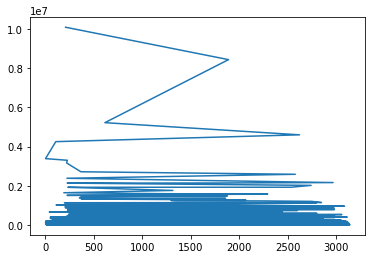

In [65]:
plt.plot(j.sort_values("population", ascending=False).population)

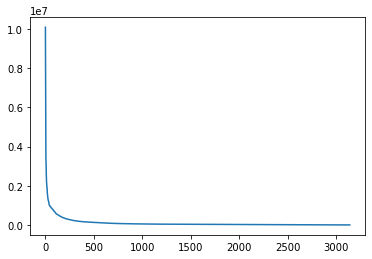

In [66]:
plt.plot(np.arange(len(j)), j.sort_values("population", ascending=False).population)

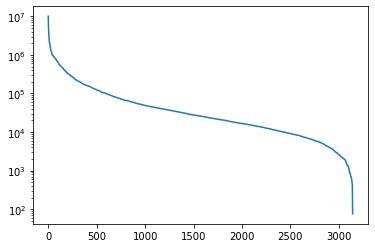

In [71]:
plt.semilogy(np.arange(len(j)), j.sort_values("population", ascending=False).population)

In [115]:
u = pd.unique(data.fipscode)
u

array([ 2020,  2170,  1001,  1003,  1015,  1031,  1033,  1039,  1043,
        1045,  1047,  1049,  1053,  1055,  1069,  1071,  1073,  1077,
        1081,  1083,  1089,  1095,  1097,  1101,  1103,  1115,  1117,
        1121,  1123,  1125,  1127,  5005,  5007,  5009,  5031,  5045,
        5051,  5063,  5069,  5115,  5119,  5125,  5131,  5139,  5143,
        5145,  4001,  4003,  4005,  4007,  4013,  4015,  4017,  4019,
        4021,  4025,  4027,  6001,  6007,  6013,  6017,  6019,  6023,
        6025,  6029,  6031,  6037,  6039,  6041,  6047,  6053,  6055,
        6057,  6059,  6061,  6065,  6067,  6071,  6073,  6075,  6077,
        6079,  6081,  6083,  6085,  6087,  6089,  6095,  6097,  6099,
        6103,  6107,  6109,  6111,  6113,  6115,  8001,  8005,  8013,
        8031,  8035,  8041,  8059,  8069,  8077,  8101,  8123,  9001,
        9003,  9005,  9007,  9009,  9011,  9013,  9015, 11001, 10001,
       10003, 10005, 12001, 12005, 12009, 12011, 12015, 12017, 12019,
       12021, 12023,

In [122]:
undup = data.reindex(u)


In [123]:
undup.covid_19_deaths_total.sum()

27319.0

In [85]:
data.fipscounty.value_counts()

1      72
13     60
5      57
3      54
15     54
       ..
297     3
299     3
303     3
305     3
20      3
Name: fipscounty, Length: 177, dtype: int64

In [88]:
data.fipscode.value_counts()

51199    3
16005    3
12005    3
12001    3
48339    3
        ..
9015     3
47059    3
9013     3
9011     3
34005    3
Name: fipscode, Length: 929, dtype: int64